In [77]:
install.packages("sqldf")

also installing the dependencies ‘gsubfn’, ‘chron’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [1]:
library(ggplot2)
library(sqldf)

Loading required package: gsubfn
Loading required package: proto
Loading required package: RSQLite


In [34]:
DATA <- read.csv(file="June 10-July 12, 2015-Gaming,Jobs and Broadband.csv", header=TRUE)

In [35]:
head(DATA)

psraid,sample,int_date,lang,usr,cregion,state,form,sex,q1,⋯,ideo,hisp,birth_hisp,race,inc,ql1a,qc1,zipcode,weight,standwt
100006,1,61015,1,S,3,51,1,2,1,⋯,1,2,NA,1,99,NA,NA,20112,2.258065,0.7209406
100009,1,61015,1,U,3,24,2,2,2,⋯,3,2,NA,2,6,NA,NA,21239,2.548387,0.8136330
100011,1,61015,1,S,2,39,2,2,1,⋯,1,2,NA,1,3,NA,NA,44730,1.806452,0.5767525
100039,1,61015,1,S,3,37,2,2,1,⋯,2,2,NA,1,6,NA,NA,27028,5.032258,1.6066676
100040,1,61015,1,U,3,21,1,2,1,⋯,1,2,NA,1,3,2,NA,40511,7.161290,2.2864116
100043,1,62215,1,R,2,20,1,2,1,⋯,3,2,NA,1,8,NA,NA,67601,1.000000,0.3192737


<b>Question 1:</b> How does the enthusiasm vary with age-group of people who describe themselves as a fan of gaming or a frequent game player?

<b>Hypothesis:</b> The younger generation are more inclined towards gaming , so most people under the age of 25 are gamers as compared to other age groups.

In [57]:
subset_data_1<-sqldf('SELECT age,game4 as Gamer,count(*) as No_of_People FROM DATA where game4!="NA" group by age,game4 order by 3 desc')

In [ ]:
(subset_data_1)

In [64]:
subset_data_1$Gamer <- factor(subset_data_1$Gamer,levels=c(2,1,8,9),labels=c("No","Yes","Don't Know","Refused")) 

`geom_smooth()` using method = 'loess'


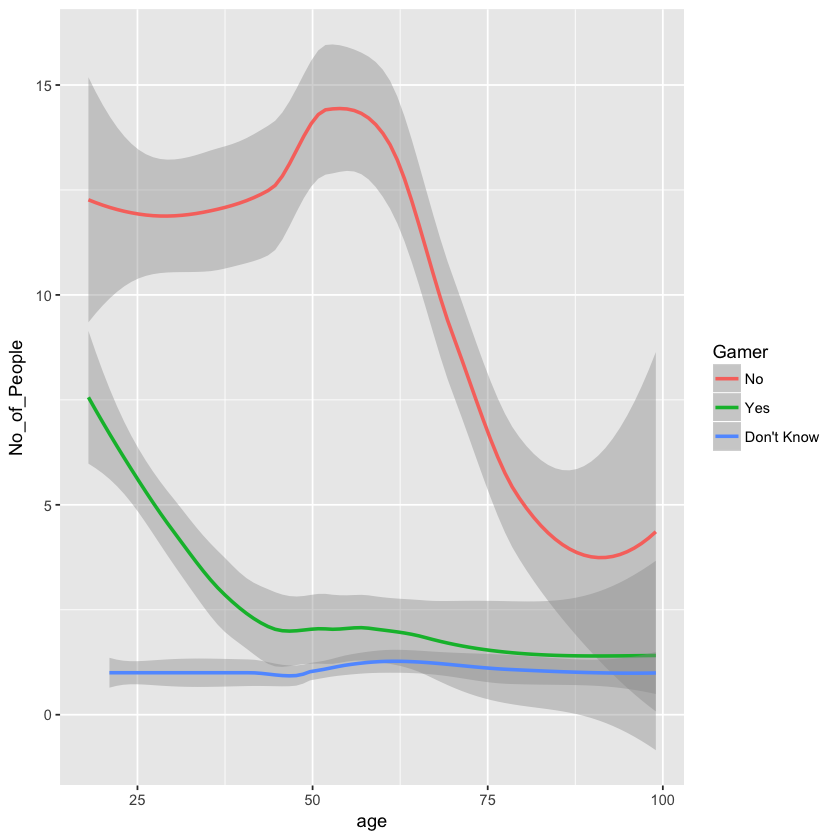

In [65]:
qplot(age,No_of_People ,colour=Gamer,data=subset_data_1, geom="smooth")

<b>Inference :</b> After plotting the graph , it was inferred that the hypothesis considered was true. We can observe that the people under the age of 25 are Game Players. The peak of Gamer="NO" is maximum for middle aged people between 50-75, which shows that the people of that age are not that interested. 

<b>Question 2:</b> In which salary slab does the maximum number of employers working Full time fall?

<b>Hypthesis:</b> According to the latest trends it is observed that most employees fall under the salary slab of under $75,000

In [37]:
subset_data_2<-sqldf('Select inc as income,emplnw as employer_type, count(*) as No_of_Employers from DATA where emplnw=1 group by inc order by 3 desc')

In [39]:
subset_data_2

income,employer_type,No_of_Employers
">$75,000",Full_time,148
">$150,000",Full_time,131
">$100,000",Full_time,114
"<$150,000",Full_time,107
">$40,000",Full_time,73
">$50,000",Full_time,67
">$30,000",Full_time,63
">$20,000",Full_time,51
Refused,Full_time,51
Don't Know,Full_time,26


In [38]:
subset_data_2$income<- factor(subset_data_2$income,levels=c(1,2,3,4,5,6,7,8,9,98,99),
labels=c(">$10,000",">$20,000",">$30,000",">$40,000",">$50,000",">$75,000",">$100,000",">$150,000","<$150,000","Don't Know","Refused"))
subset_data_2$employer_type<- factor(subset_data_2$employer_type,levels=c(1),labels=c("Full_time"))

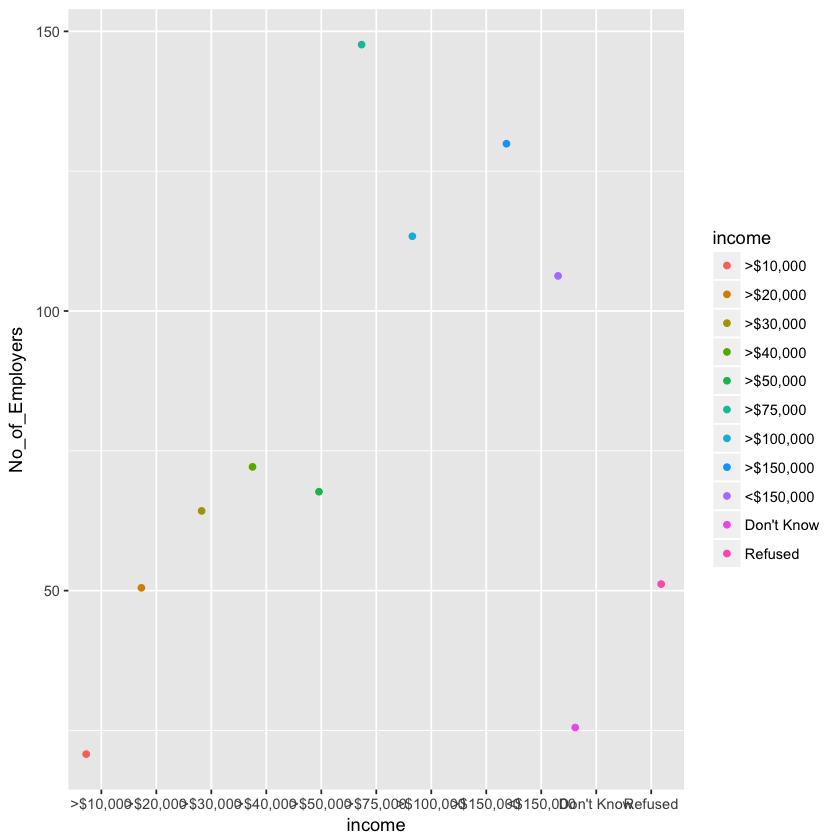

In [71]:
qplot(income,No_of_Employers,colour=income,data=subset_data_2, geom="jitter")


<b>Inference : </b>From the graph it can be inferred that average salary of the employees working as the Full Time is around $75,000. Also it can be seen that Full time employees are paid well. 

<b>Question 3 :</b> At what education level is the internet most used on cell phones,tablets or other mobile held devices?

<b>Hypothesis:</b> The Students who are pursuing higher education tend to use more internet on mobile held devices as compared to others as universities' curriculum is designed such that it requires more use of internet to keep oneself update with the technologies.

In [82]:
subset_data_3<-sqldf('select count(*) as No_of_users,educ2 as Education_level,intmob as Internet_use from DATA where intmob="1"or intmob="2" group by educ2 , intmob order by 1 desc')




In [83]:
subset_data_3

No_of_users,Education_level,Internet_use
347,6,1
308,8,1
303,3,1
247,4,1
180,3,2
151,5,1
92,4,2
69,8,2
63,6,2
52,2,1


The abbreviation of the Education levels are as follows:
<li>LH=>High_School</li>
<li>IH=Incomplete High school</li>
<li>H=High School</li>
<li>ND=No Degree</li>
<li>Y2=2 Year</li>
<li>B=Bachelors</li>
<li>NP=No Postgraduate</li>
<li>P=Postgraduate</li>
<li>IDK=Don't Know</li>
<li>R=Refused</li>

In [84]:
subset_data_3$Internet_use<-factor(subset_data_3$Internet_use,levels=c(1,2),labels=c("yes","no"))
subset_data_3$Education_level <- factor(subset_data_3$Education_level,levels=c(1,2,3,4,5,6,7,8,98,99),labels=c("LH","IH","H","ND","Y2","B","NP","P","IDK","R")) 

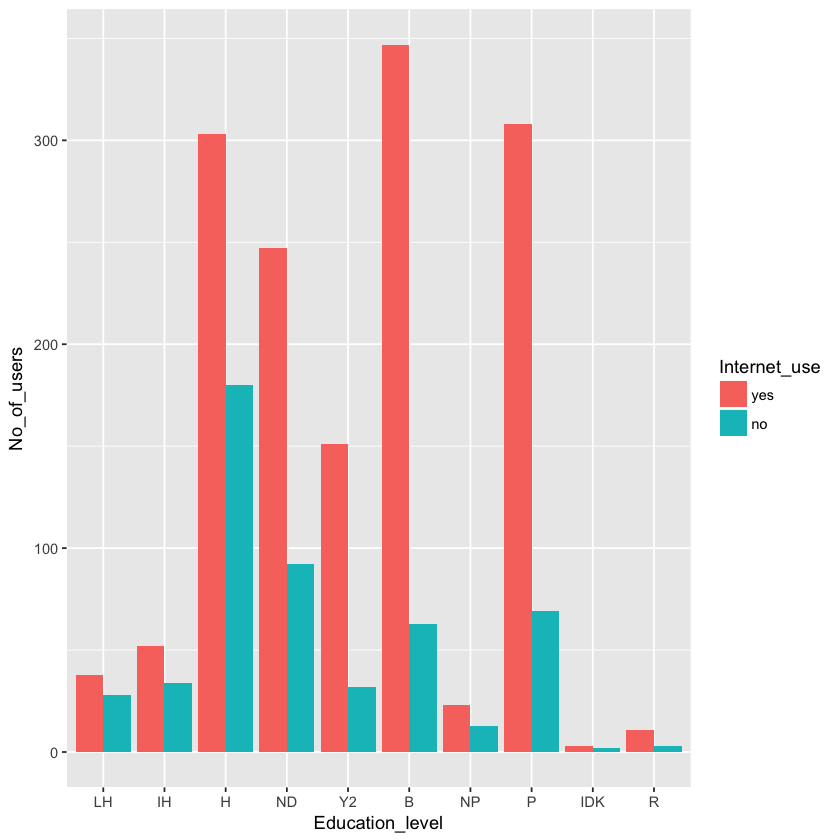

In [85]:
ggplot(data=subset_data_3, aes(x=Education_level, y=No_of_users, fill=Internet_use)) +
    geom_bar(stat="identity", position=position_dodge())

<b>Inference</b>:From the graph it can be inferred that the people who are pursing Bachelors degree make use of the internet the most. The next in line is the people who are Graduates or pursiung that. Thus the hypothesis comes to be true.

<b>Question 4:</b> What are the ideologies of the people under the age of 30 if they belong to Republican , Democrat or Independant parties ?

<b>Hypothesis:</b> The young generation who are interested in the politics usually belong to the independant parties having a moderate thinking as compared to others.  

In [57]:
subset_data_4<-sqldf('select count(*) as count,party,ideo as ideology,age from DATA where (party="1" or party="2" or party="3") AND (age BETWEEN 17 and 30) group by ideo,age,party order by 4 desc')







In [60]:
subset_data_4

count,party,ideology,age
1,Republican,Very conservative,30
1,Republican,Conservative,30
1,Democrat,Conservative,30
7,Independant,Conservative,30
1,Republican,Moderate,30
6,Democrat,Moderate,30
3,Independant,Moderate,30
2,Democrat,Liberal,30
2,Independant,Liberal,30
1,Independant,Very Liberal,30


In [59]:
subset_data_4$party<-factor(subset_data_4$party,levels=c(1,2,3),labels=c("Republican","Democrat","Independant"))
subset_data_4$ideology<-factor(subset_data_4$ideology,levels=c(1,2,3,4,5,8,9),labels=c("Very conservative","Conservative","Moderate","Liberal","Very Liberal","Don't Know","Refused"))




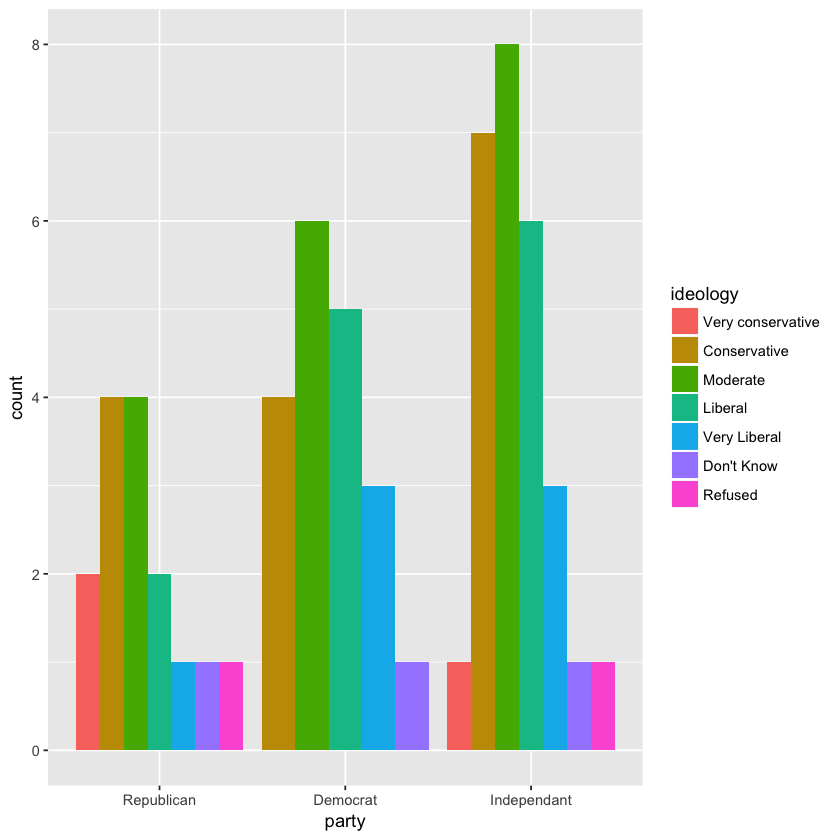

In [61]:
ggplot(data=subset_data_4, aes(x=party, y=count, fill=ideology)) +
    geom_bar(stat="identity", position=position_dodge())

<b>Inference</b>: From the graph it can be concluded that the hypothesis set is true. The young generation (aged between 18 and 30)are of moderate thinking maximum
belonging to the Independant parties. Further it can be concluded that the Republican and Democrat parties also have young people having a moderate thinking as its highest number.



<b>Question 5: </b>Are there any gender biased view on the opinion that "Online dating allows people to find a better match for themselves because they can get to know a lot more people"?

<b>Hypothesis:</b> There won't be a vast difference on the basis of gender on the above said opinion.

In [80]:
subset_data_5<-sqldf('select count(*) as count , sex , date4b from DATA  group by sex,date4b order by 1 desc  ')


In [83]:
subset_data_5

count,sex,date4b
508,Male,Agree
485,Female,Agree
452,Female,Disagree
397,Male,Disagree
72,Male,Don't Know
66,Female,Don't Know
12,Male,Refused
9,Female,Refused


In [82]:
subset_data_5$sex<-factor(subset_data_5$sex,levels=c(1,2),labels=c("Male","Female"))
subset_data_5$date4b<-factor(subset_data_5$date4b,levels=c(1,2,8,9),labels=c("Agree","Disagree","Don't Know","Refused"))



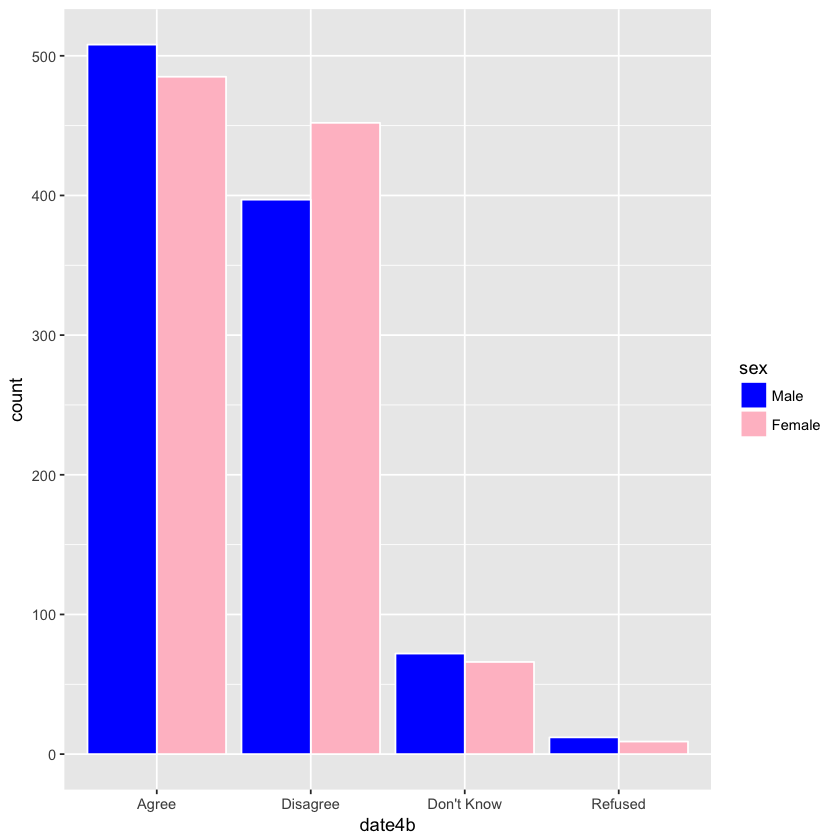

In [109]:
ggplot(data=subset_data_5, aes(x=date4b, y=count, fill=sex)) +
    geom_bar(stat="identity", position=position_dodge(), colour="white") +
    scale_fill_manual(values=c("#0000FF", "#FFC0CB"))

<b>Inference:</b> From the above graph it can be inferred that both male and female believe that using the online dating concept helps them to find a better partner.Another surprising result is that almost equal number of females disagree to the above opinion. 

<b>Question 6:</b> What is the marital status of the people who use the dating app?

<b>Hypothesis :</b> The dating app is for the singles, so the married population will be less likely to use it.

In [16]:
subset_data_6<-sqldf('select count(*) as count ,date1a , marital from DATA where date1a!="NA" group by date1a , marital order by 1 desc')

In [18]:
subset_data_6

count,date1a,marital
871,Disagree,Married
287,Disagree,Never been married
118,Disagree,Divorced
97,Disagree,Live-in
97,Disagree,Widowed
87,Agree,Never been married
52,Agree,Married
40,Agree,Divorced
27,Disagree,Separated
20,Agree,Live-in


In [17]:
subset_data_6$marital<-factor(subset_data_6$marital,levels=c(1,2,3,4,5,6),labels=c("Married","Live-in","Divorced","Separated","Widowed","Never been married"))
subset_data_6$date1a<-factor(subset_data_6$date1a,levels=c(1,2),labels=c("Agree","Disagree"))


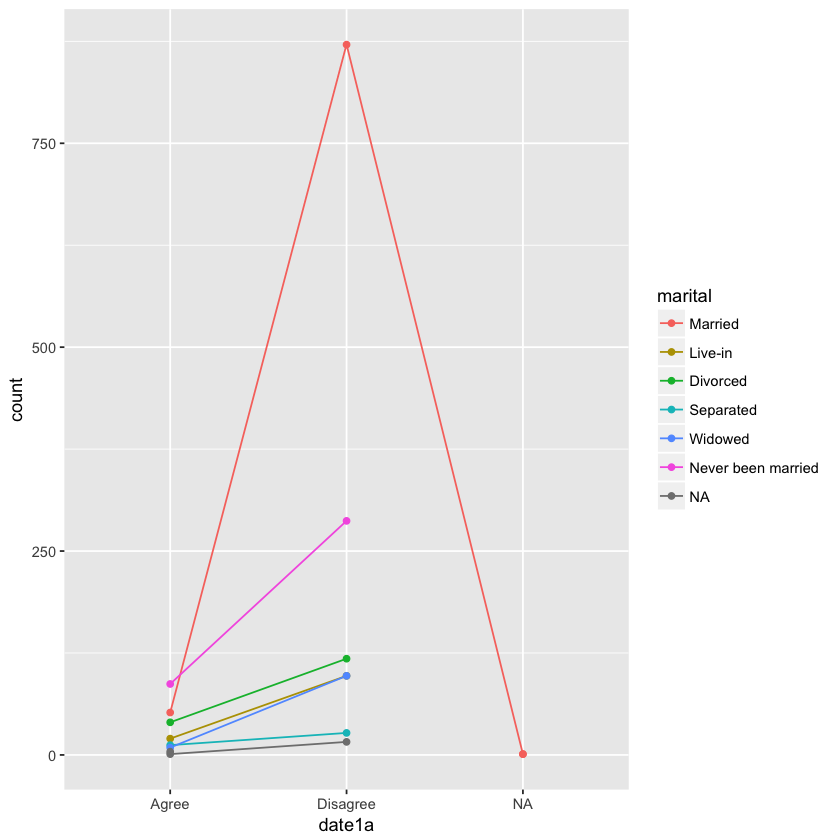

In [32]:
ggplot(data=subset_data_6, aes(x=date1a, y=count, group=marital, colour=marital)) +
    geom_line() +
    geom_point()

<b>Inference: </b> From the graph it can be inferred that more than 50% of the people do not use the dating app as all of them are married. It can also be observed that most of the people do not use the dating app.